# Import images

Import background image, carton front image and carton back image into the system

In [2]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
from skimage import io 

try:
    sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
except:
    'remove python 2.7 kinetic folder to make cv2 library importable'

import cv2

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
# sys.path.append(ROOT_DIR)  # To find local version of the library
# from mrcnn.config import Config
# from mrcnn import utils
# import mrcnn.model as modellib
# from mrcnn import visualize
# from mrcnn.model import log


#load background image, front image of the carton, back image of the carton
bg_img = io.imread('/home/qxuaj/carton_folding/Mask_RCNN/process_image/original_carton_pictures/background.jpg')
front_img = io.imread('/home/qxuaj/carton_folding/Mask_RCNN/process_image/original_carton_pictures/green_carton_front.bmp')
back_img = io.imread('/home/qxuaj/carton_folding/Mask_RCNN/process_image/original_carton_pictures/green_carton_back.bmp')

front_pink_img = io.imread('/home/qxuaj/carton_folding/Mask_RCNN/process_image/original_carton_pictures/pink_carton_front.bmp', cv2.IMREAD_COLOR)
back_pink_img = io.imread('/home/qxuaj/carton_folding/Mask_RCNN/process_image/original_carton_pictures/pink_carton_back.bmp', cv2.IMREAD_COLOR)

# print(bg_img)

# plt.subplot(1, 1, 1)
# plt.title('background')
# plt.imshow('background',bg_img)
# plt.show()

# plt.subplot(2,3,2)
# plt.title('carton front')
# cv2.imshow('carton front',front_img)

# plt.subplot(2,3,3)
# plt.title('carton back')
# cv2.imshow('carton back',back_img)

# plt.subplot(2,3,4)
# plt.title('pink carton front')
# cv2.imshow('pink carton front',front_pink_img)

# plt.subplot(2,3,5)
# plt.title('pink carton back')
# cv2.imshow('pink carton back',back_pink_img)


generate new image with background image and carton image

(768, 1024, 3)

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]


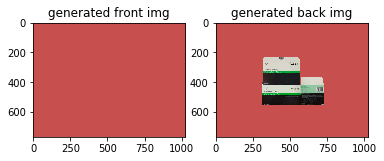

In [3]:
import sys

bg_dim = bg_img.shape
front_dim = front_img.shape
back_dim = back_img.shape

#generate front image
#for i in front image width
front_img_generated = bg_img.copy()

    
for i in range(front_dim[0]):
    for j in range(front_dim[1]):
        if (front_img[i][j] != [255,255,255]).all():
            front_img_generated[i][j] = front_img[i][j]
plt.subplot(1, 2, 1)
plt.title('generated front img')
plt.imshow(bg_img)

display(front_dim)

#generate back image
#for i in front image width
back_img_generated = bg_img.copy()

print(back_img[0])
    
for i in range(back_dim[0]):
    for j in range(back_dim[1]):
        if (back_img[i][j] != [255,255,255]).all():
            back_img_generated[i][j] = back_img[i][j]
plt.subplot(1, 2, 2)
plt.title('generated back img')
plt.imshow(back_img_generated)
io.imsave('/home/qxuaj/carton_folding/Mask_RCNN/process_image/out.jpg', back_img_generated)
io.imsave('/home/qxuaj/carton_folding/Mask_RCNN/process_image/out2.jpg', front_img_generated)


#display all images
plt.show()


# Define anotatation and rotation functions

In [4]:
import json
import math


all_points_x_green_carton_front = [373,361,361,283,279,274,276,500,499,492,485,426,426]
all_points_y_green_carton_front = [204,212,274,275,299,299,380,378,213,205,202,203,204]

all_points_x_pink_carton_front = [390,442,447,457,327,323,332,383,383,389]
all_points_y_pink_carton_front = [334,326,331,451,453,401,383,383,341,334]

def get_position_after_rotation(origin_point, center_point, rotation_deg):
    origin_x = origin_point[0]
    origin_y = origin_point[1]
    
    center_x = center_point[0]
    center_y = center_point[1]
    
    after_rotation_x = center_x + cos(rotation_deg / 180.0 * math.pi)*(origin_x-center_x) + sin(rotation_deg / 180.0 * math.pi) * (origin_y - center_y)
    after_rotation_y = center_y - sin(rotation_deg / 180.0 * math.pi)*(origin_x-center_x) + cos(rotation_deg / 180.0 * math.pi) * (origin_y - center_y)                        
    return [floor(after_rotation_x), floor(after_rotation_y)]


def append_img_anoation(all_img_anotation, filename, filesize, height_offset, width_offset, rotation_deg, rotation_center, all_points_x, all_points_y):
    #all_img_anotation = {}

    img_name = filename+str(filesize)
        
    #filename = "front.jpg"
    #filesize = 13223
    #all_points_x = [373,361,361,283,279,274,276,500,499,492,485,426,426]
    #all_points_y = [204,212,274,275,299,299,380,378,213,205,202,203,204]

    img_anotation = {}
    img_anotation["filename"] = filename
    img_anotation["size"] = filesize

    #fill imag_anotation['region']
    img_anotation_list_dict = {}

    #fill shape attribute dict of the image
    img_anotation_list_dict_shape_attribute_dict = {}
    img_anotation_list_dict_shape_attribute_dict["name"] = "polygon"
    
    all_points_x_after_rotation = []
    all_points_y_after_rotation = []
    
    #calculate the point after rotation
    for i in range(len(all_points_x)):
        origin_point = [all_points_x[i], all_points_y[i]]
        after_rotation_point = get_position_after_rotation(origin_point, rotation_center, rotation_deg)
        if (after_rotation_point[0] <= 0):
            print('alert found '+str(after_rotation_point[0])+'<0')
        if (after_rotation_point[1] <= 0):
            print('alert found '+str(after_rotation_point[1])+'<0')
            
        all_points_x_after_rotation.append(after_rotation_point[0])
        all_points_y_after_rotation.append(after_rotation_point[1])
        
    img_anotation_list_dict_shape_attribute_dict["all_points_x"] = [all_points_x_after_rotation[i] + width_offset for i in range(len(all_points_x_after_rotation))]
    img_anotation_list_dict_shape_attribute_dict["all_points_y"] = [all_points_y_after_rotation[i] + height_offset for i in range(len(all_points_y_after_rotation))]

    img_anotation_list_dict["shape_attributes"] = img_anotation_list_dict_shape_attribute_dict

    #fill file attribute
    img_anotation_list_dict["region_attributes"] = {}

    img_anotation_regions_list = [img_anotation_list_dict]
    img_anotation["regions"] = img_anotation_regions_list


    if (img_name in all_img_anotation):
        all_img_anotation[img_name]["regions"].append(img_anotation_list_dict)
    else:
        all_img_anotation[img_name] = img_anotation

    #fill img_anotation['file_attributes']
    img_anotation['file_attributes'] = {}

all_img_anotation = {}
#append_img_anoation(all_img_anotation, 'front.jpg', 13223)
#print(json.dumps(all_img_anotation))

# Generate training datasets

In [88]:
import os
from math import *
import random

height_offset_left = -120
height_offset_right = 120
#height_offset_right = 1

width_offset_left = -200
width_offset_right = 200
#width_offset_right = 1

offset_step_size = 200

rotation_deg = 0.0
rotation_center_green = [1024/2, 768/2]
rotation_center_pink = [1024/2, 768/2]
rotation_deg_begin = 0
rotation_deg_end = 90
rotation_deg_step = 90

all_carton_imgs = [front_img, back_img]

steps_all = 120 - 84
pink_img_top_flag = 1

#print('height image count', height_step_all)
#print('width image count', width_step_all)
#print('rotation  count', rotation_step_all)
print('all image count: ', steps_all)

img_no = 84
all_img_anotation = {}

# if generated picture will be in range of picture
width_offset_array = [width_offset_left, width_offset_right]
height_offset_array = [height_offset_left, height_offset_right]



#for height_offset in range(height_offset_left, height_offset_right, offset_step_size):
#    for width_offset in range(width_offset_left, width_offset_right, offset_step_size):
#        for rotation_deg in range(rotation_deg_begin, rotation_deg_end, rotation_deg_step):

for iteration in range(steps_all):
    
    #generate pink carton image with image generated before    
#     height_offset = height_offset_array[iteration % 2]
#     width_offset = width_offset_array[iteration % 2]
#     rotation_deg = 135
    #
    carton_box_num = random.randint(1, 4)
    img_generated = bg_img.copy()
    
    for carton_box_index in range(carton_box_num):
    
        carton_type = random.randint(0, 1)

        carton_img = all_carton_imgs[carton_type]

        #generate random offset and rotation of the carton box
        height_offset = random.randint(height_offset_left, height_offset_right)
        width_offset = random.randint(width_offset_left, width_offset_right)
        rotation_deg = random.randint(rotation_deg_begin, rotation_deg_end)



        for i in range(front_dim[0]):
            for j in range(front_dim[1]):
                origin_x = j
                origin_y = i
                origin_point = [origin_x, origin_y]
                if (carton_img[i][j] != [255,255,255]).all():
                    after_point = get_position_after_rotation(origin_point, rotation_center_green, rotation_deg)
                    #after_rotation_x = cos(rotation_deg / 180.0 * math.pi)*origin_x + sin(rotation_deg / 180.0 * math.pi) * origin_y
                    #after_rotation_y = -sin(rotation_deg / 180.0 * math.pi)*origin_x + cos(rotation_deg / 180.0 * math.pi) * origin_y
                    #after_rotation_i = after_rotation_y
                    #after_rotation_j = after_rotation_x                        
                    #img_generated[i+height_offset][j+width_offset] = carton_img[i][j]
                    img_generated[after_point[1]+height_offset][after_point[0]+width_offset] = carton_img[i][j]
                    for offset_i in range(2):
                        for offset_j in range(2):                       
                            img_generated[after_point[1]+height_offset+offset_i][after_point[0]+width_offset+offset_j] = carton_img[i][j]


    if img_no < 4:
        #plt.subplot(height_step_all*rotation_step_all, width_step_all, img_no+1)
        plt.subplot(2, 2, img_no+1)
        plt.title('generated front img')
        plt.imshow(img_generated)


    #save generated image file
    img_no += 1
    print('processing image No.'+str(img_no))
    file_path = './train/img'+str(img_no)+'.jpg'
    io.imsave(file_path, img_generated)

    
    #update anotation json file
    #get size of the image
    
#     filesize = os.path.getsize(file_path)
#     filename = 'front'+str(img_no)+'.jpg'
    
#     append_img_anoation(all_img_anotation, filename, filesize, height_offset_pink, width_offset_pink, rotation_deg_pink, rotation_center_pink, all_points_x_pink_carton_front, all_points_y_pink_carton_front)
#     append_img_anoation(all_img_anotation, filename, filesize, height_offset, width_offset, rotation_deg, rotation_center_green, all_points_x_green_carton_front, all_points_y_green_carton_front)

# f = open('./train/img_anotation.json', 'w')
# f.write(json.dumps(all_img_anotation))
# f.close()
# print('write all images completed')
# print('writing to json completed')
        

all image count:  36
processing image No.85
processing image No.86
processing image No.87
processing image No.88
processing image No.89
processing image No.90
processing image No.91
processing image No.92
processing image No.93
processing image No.94
processing image No.95
processing image No.96
processing image No.97
processing image No.98
processing image No.99
processing image No.100
processing image No.101
processing image No.102
processing image No.103
processing image No.104
processing image No.105
processing image No.106
processing image No.107
processing image No.108
processing image No.109
processing image No.110
processing image No.111
processing image No.112
processing image No.113
processing image No.114
processing image No.115
processing image No.116
processing image No.117
processing image No.118
processing image No.119
processing image No.120


# Generate validation datasets

all image count:  10
processing image No.1
processing image No.2
processing image No.3
processing image No.4
processing image No.5
processing image No.6
processing image No.7
processing image No.8
processing image No.9
processing image No.10


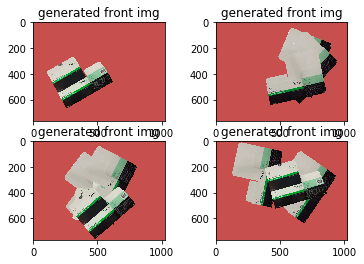

In [5]:
import os
from math import *
import random

height_offset_left = -120
height_offset_right = 120
#height_offset_right = 1

width_offset_left = -200
width_offset_right = 200
#width_offset_right = 1

offset_step_size = 200

rotation_deg = 0.0
rotation_center_green = [1024/2, 768/2]
rotation_center_pink = [1024/2, 768/2]
rotation_deg_begin = 0
rotation_deg_end = 90
rotation_deg_step = 90

all_carton_imgs = [front_img, back_img]

steps_all = 10
#print('height image count', height_step_all)
#print('width image count', width_step_all)
#print('rotation  count', rotation_step_all)
print('all image count: ', steps_all)

img_no = 0
all_img_anotation = {}

# if generated picture will be in range of picture
width_offset_array = [width_offset_left, width_offset_right]
height_offset_array = [height_offset_left, height_offset_right]



for iteration in range(steps_all):
    
    carton_box_num = random.randint(1, 4)
    img_generated = bg_img.copy()
    
    for carton_box_index in range(carton_box_num):
    
        carton_type = random.randint(0, 1)

        carton_img = all_carton_imgs[carton_type]

        #generate random offset and rotation of the carton box
        height_offset = random.randint(height_offset_left, height_offset_right)
        width_offset = random.randint(width_offset_left, width_offset_right)
        rotation_deg = random.randint(rotation_deg_begin, rotation_deg_end)



        for i in range(front_dim[0]):
            for j in range(front_dim[1]):
                origin_x = j
                origin_y = i
                origin_point = [origin_x, origin_y]
                if (carton_img[i][j] != [255,255,255]).all():
                    after_point = get_position_after_rotation(origin_point, rotation_center_green, rotation_deg)
                    img_generated[after_point[1]+height_offset][after_point[0]+width_offset] = carton_img[i][j]
                    for offset_i in range(2):
                        for offset_j in range(2):                       
                            img_generated[after_point[1]+height_offset+offset_i][after_point[0]+width_offset+offset_j] = carton_img[i][j]


    if img_no < 4:
        #plt.subplot(height_step_all*rotation_step_all, width_step_all, img_no+1)
        plt.subplot(2, 2, img_no+1)
        plt.title('generated front img')
        plt.imshow(img_generated)


    #save generated image file
    img_no += 1
    print('processing image No.'+str(img_no))
    file_path = './val/img'+str(img_no)+'.jpg'
    io.imsave(file_path, img_generated)

    
        

# Generate large images

In [14]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
from skimage import io 

try:
    sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
except:
    'remove python 2.7 kinetic folder to make cv2 library importable'

import cv2

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

#load background image, front image of the carton, back image of the carton
bg_img = io.imread('/home/qxuaj/carton_folding/Mask_RCNN/process_image/original_carton_pictures/background.jpg')
front_img = io.imread('/home/qxuaj/carton_folding/Mask_RCNN/process_image/original_carton_pictures/green_carton_front_large.bmp')
back_img = io.imread('/home/qxuaj/carton_folding/Mask_RCNN/process_image/original_carton_pictures/green_carton_back_large.bmp')

bg_dim = bg_img.shape
front_dim = front_img.shape
back_dim = back_img.shape

In [15]:
import json
import math


def get_position_after_rotation(origin_point, center_point, rotation_deg):
    origin_x = origin_point[0]
    origin_y = origin_point[1]
    
    center_x = center_point[0]
    center_y = center_point[1]
    
    after_rotation_x = center_x + cos(rotation_deg / 180.0 * math.pi)*(origin_x-center_x) + sin(rotation_deg / 180.0 * math.pi) * (origin_y - center_y)
    after_rotation_y = center_y - sin(rotation_deg / 180.0 * math.pi)*(origin_x-center_x) + cos(rotation_deg / 180.0 * math.pi) * (origin_y - center_y)                        
    return [floor(after_rotation_x), floor(after_rotation_y)]




In [20]:
import os
from math import *
import random

height_offset_left = -60
height_offset_right = 60
#height_offset_right = 1

width_offset_left = -100
width_offset_right = 100
#width_offset_right = 1

offset_step_size = 200

rotation_deg = 0.0
rotation_center_green = [1024/2, 768/2]
rotation_center_pink = [1024/2, 768/2]
rotation_deg_begin = -20
rotation_deg_end = 20
rotation_deg_step = 90

all_carton_imgs = [front_img, back_img]

steps_all = 10
pink_img_top_flag = 1

#print('height image count', height_step_all)
#print('width image count', width_step_all)
#print('rotation  count', rotation_step_all)
print('all image count: ', steps_all)

img_no = 15
all_img_anotation = {}

# if generated picture will be in range of picture
width_offset_array = [width_offset_left, width_offset_right]
height_offset_array = [height_offset_left, height_offset_right]



#for height_offset in range(height_offset_left, height_offset_right, offset_step_size):
#    for width_offset in range(width_offset_left, width_offset_right, offset_step_size):
#        for rotation_deg in range(rotation_deg_begin, rotation_deg_end, rotation_deg_step):

for iteration in range(steps_all):
    
    #generate pink carton image with image generated before    
#     height_offset = height_offset_array[iteration % 2]
#     width_offset = width_offset_array[iteration % 2]
#     rotation_deg = 0
    #
    carton_box_num = random.randint(2, 2)
    img_generated = bg_img.copy()
    
    for carton_box_index in range(carton_box_num):
    
        carton_type = random.randint(0, 1)

        carton_img = all_carton_imgs[carton_type]

        #generate random offset and rotation of the carton box
        height_offset = random.randint(height_offset_left, height_offset_right)
        width_offset = random.randint(width_offset_left, width_offset_right)
        rotation_deg = random.randint(rotation_deg_begin, rotation_deg_end)



        for i in range(front_dim[0]):
            for j in range(front_dim[1]):
                origin_x = j
                origin_y = i
                origin_point = [origin_x, origin_y]
                if (carton_img[i][j] != [255,255,255]).all():
                    after_point = get_position_after_rotation(origin_point, rotation_center_green, rotation_deg)
                    #after_rotation_x = cos(rotation_deg / 180.0 * math.pi)*origin_x + sin(rotation_deg / 180.0 * math.pi) * origin_y
                    #after_rotation_y = -sin(rotation_deg / 180.0 * math.pi)*origin_x + cos(rotation_deg / 180.0 * math.pi) * origin_y
                    #after_rotation_i = after_rotation_y
                    #after_rotation_j = after_rotation_x                        
                    #img_generated[i+height_offset][j+width_offset] = carton_img[i][j]
                    img_generated[after_point[1]+height_offset][after_point[0]+width_offset] = carton_img[i][j]
                    for offset_i in range(2):
                        for offset_j in range(2):                       
                            img_generated[after_point[1]+height_offset+offset_i][after_point[0]+width_offset+offset_j] = carton_img[i][j]


    if img_no < 4:
        #plt.subplot(height_step_all*rotation_step_all, width_step_all, img_no+1)
        plt.subplot(2, 2, img_no+1)
        plt.title('generated front img')
        plt.imshow(img_generated)


    #save generated image file
    img_no += 1
    print('processing image No.'+str(img_no))
    file_path = './train_large/img'+str(img_no)+'.jpg'
    io.imsave(file_path, img_generated)

    
  

all image count:  10
processing image No.16
processing image No.17
processing image No.18
processing image No.19
processing image No.20
processing image No.21
processing image No.22
processing image No.23
processing image No.24


IndexError: index 768 is out of bounds for axis 0 with size 768